# MSIS2802/IDIS3802 Spring 2019 Makeup Midterm

### There is only one data set for this makeup: MSIS_salaries.csv. Use this .csv and answer the following questions.

Answer the following questions  in a Jupyter notebook. Use Markdown cells to clearly identify which question(s) you are answering.

### 1. Describe the data set in terms of how many rows and columns are there.

### 2. Find all job titles that have more than 7% of entries 

### 3. Create a histogram of NA counts (by column).
### 4 Design a graph using Seaborne to compare the distribution of the highest on average paying job title and the lowest average paying job title. If there are two jobs that are on average paid the same, pick whichever you would like.

### 5. Create a column that assigns each row a unique identifier (and id number). Rename columns into [Identifier], [age], [industry], [job_title], [currency], [location], and [post_college experience].

### 6. Use the identifiers that you created from question 4. Find entries that contain annual salaries that are over 60,000 (also can be shown as 60000) and have less or equal to 5 years of professional work experience. Show your findings in one table and show at least 11 rows of that table.

### 7. Create a new column that shows true of false on whether their job tiltes are Data Scientist or containing "Data Scien". Show how many of them are there in this data set and what location contains the most of them. If two or more locations have the same amount of results, show all of them. Show your findings in one table.

### 8. If you are over or equal to 25 years old, what is the probability that you make over or equal to 100k. Use some kind of statistical framework to show how you can achieve that goal by taking advantages of your location, industry and professional experience.

### 9. Find 3 interesting insights from the data set. Write a brief report on these insights as if you are going to present to the corresponding HR data science team in your company. The report should be written in a Jupyter Notebook using markdown, and should not be excessively long. Show your findings, mention the model or technique used to identify each finding, but do not go into details about your code.

### 10. Create a regression model to to predict a person's salary.

### 11. Create a classification model to to predict a person's job title.
### 12 (Bonus Question): Create a clustering model and use it to identify an interesting pattern.

<b> PS:</b> You will incur penalties if:
<ul>
<li>Your code is wrong</li>
<li>Your code would not work on different data</li>
<li>Your code is unnecessarily slow (you use a for loop, or you use DataFrame.apply unnecessarily, etc)
<li>You answer is composed of more than one output and it is not clear which question(s) you are answering</ul>
   Note:
<ul>  You are responsible for importing the csv yourself, dealing with NA's, and cleaning and preparing the data. This is a real-world dataset, with all the typos, mistakes, and random commentary you will see in your careers.

Good luck!
</ul>

In [186]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [481]:
df = pd.read_csv('MSIS_salaries.csv')
df_null = pd.read_csv('MSIS_salaries.csv')

In [188]:
df.isna().sum()

Timestamp                                                                      0
How old are you?                                                            2258
What industry do you work in?                                               2680
Job title                                                                   2259
What is your annual salary?                                                 2259
Please indicate the currency                                                2258
Where are you located? (City/state/country)                                 2980
How many years of post-college professional work experience do you have?    2258
dtype: int64

In [189]:
df.dropna(subset = ['Where are you located? (City/state/country)'], how = 'any', inplace = True)

In [190]:
df.isna().sum()

Timestamp                                                                     0
How old are you?                                                              0
What industry do you work in?                                               263
Job title                                                                     0
What is your annual salary?                                                   1
Please indicate the currency                                                  0
Where are you located? (City/state/country)                                   0
How many years of post-college professional work experience do you have?      0
dtype: int64

In [191]:
df.dropna(subset = ['What industry do you work in?'], how = 'any', inplace = True)

In [192]:
df['What industry do you work in?']=df['What industry do you work in?'].str.lower()
df['What industry do you work in?'] = df['What industry do you work in?'].str.replace(r'\([^()]*\)',"")
df['What industry do you work in?']=df['What industry do you work in?'].str.replace('\d+', '')
df['What industry do you work in?']=df['What industry do you work in?'].str.replace('[./\"&-+,$£~-]', '')
df['What industry do you work in?']=df['What industry do you work in?'].str.strip()


In [193]:
df['What industry do you work in?']=df['What industry do you work in?'].str.replace('\d+', '')

In [194]:
df.head(20)

,Timestamp,How old are you?,What industry do you work in?,Job title,What is your annual salary?,Please indicate the currency,Where are you located? (City/state/country),How many years of post-college professional work experience do you have?
0,4/24/2019 11:43:21,35-44,government,Talent Management Asst. Director,75000,USD,"Nashville, TN",11 - 20 years
1,4/24/2019 11:43:26,25-34,environmental nonprofit,Operations Director,"65,000",USD,"Madison, Wi",8 - 10 years
2,4/24/2019 11:43:27,18-24,market research,Market Research Assistant,"36,330",USD,"Las Vegas, NV",2 - 4 years
3,4/24/2019 11:43:27,25-34,biotechnology,Senior Scientist,34600,GBP,"Cardiff, UK",5-7 years
4,4/24/2019 11:43:29,25-34,healthcare,Social worker (embedded in primary care),55000,USD,"Southeast Michigan, USA",5-7 years
5,4/24/2019 11:43:29,25-34,information management,Associate Consultant,"45,000",USD,"Seattle, WA",8 - 10 years
6,4/24/2019 11:43:30,25-34,nonprofit,Development Manager,"51,000",USD,"Dallas, Texas, United States",2 - 4 years
7,4/24/2019 11:43:30,25-34,higher education,Student Records Coordinator,"54,371",USD,Philadelphia,8 - 10 years
8,4/24/2019 11:43:34,35-44,libraries,Director,45000,USD,"Bridgeport, mi. Usa",8 - 10 years
9,4/24/2019 11:43:35,25-34,business services,Copywriter,80000,USD,DC,11 - 20 years


In [195]:
# this concept is explained by Kshitija sankhe 

def industry_change(industry):
    industry = str(industry)
    if ('education' in industry) or ('higher' in industry) or ('academia' in industry)\
    or ('academic' in industry) or ('educational' in industry):
        return 'Education industry'
    
    if ('software' in industry) or ('technology' in industry) or ('it' in industry)\
    or ('information' in industry) or ('development' in industry):
        return 'Software industry'
    
    if ('health' in industry) or ('medical' in industry) or ('care' in industry) or ('medicine' in industry)\
    or ('biotech' in industry) or ('pharmaceutical' in industry) or ('biotechnology' in industry) or \
    ('medicine' in industry) or ('pharma' in industry):
        return 'Healthcare Industry'
    
    if ('manufacture' in industry) or ('retail' in industry) or ('consumer' in industry)\
    or ('logistics' in industry) or ('goods' in industry):
        return 'Manufacturing Industry'
    
    if ('finance' in industry) or ('financial' in industry) or ('fintech' in industry):
        return 'Financial Industry'
    
    
    if ('legal' in industry) or ('law' in industry):
        return 'Legal Industry'
    
    if ('insurance' in industry):
        return 'Insurance Industry'
    
    if ('consulting' in industry):
        return 'Consulting Industry'
    
    if ('services' in industry) or ('hospitality' in industry) or ('service' in industry)\
    or ('professional' in industry) or ('social' in industry) or ('transportation' in industry)\
    or ('communication' in industry) or ('contracting' in industry) or ('fundraiser' in industry):
        return 'Services industry'
    
    if ('ecommerce' in industry):
        return 'Ecommerce Industry'
    
    if ('marketing' in industry) or ('sales' in industry) or ('market' in industry):
        return 'Marketing Industry'
    
    if ('gas' in industry) or ('oil' in industry):
        return 'gas and oil Industry'
    
    if ('constructing' in industry) or ('real' in industry) or ('estate' in industry)\
    or ('architecture' in industry) or ('civil' in industry):
        return 'Marketing Industry'
    
    if ('media' in industry) or ('advertising' in industry) or ('entertainment' in industry)\
    or ('arts' in industry) or ('journalism' in industry):
        return 'Media Industry'
    
    if ('telecommunications' in industry) or ('engineering' in industry) or ('digital' in industry)\
    or ('devices' in industry) or ('design' in industry)\
    or ('electronics' in industry) or ('semiconductor' in industry) or ('engineering' in 'development'):
        return 'Engineering Industry'
    
    
    if ('research' in industry) or ('development' in industry):
        return 'R&D Industry'
    
    
    if ('management' in industry) or ('human' in industry) or ('resources' in industry)\
    or ('relations' in industry) or ('hr' in industry):
        return 'Management Industry'
    
   
    
    
    
    
    
    return industry

In [196]:
df['What industry do you work in?'] = df['What industry do you work in?']\
.apply(lambda x : industry_change(x))

In [197]:
df['What industry do you work in?'] = df['What industry do you work in?'].str.lower()

## TITLES CLEANING

In [198]:
# https://stackoverflow.com/questions/40836423/removing-parenthesis-from-a-string-in-pandas-with-str-replace/52430706
df['Job title']=df['Job title'].str.lower()
df['Job title'] = df['Job title'].str.replace(r'\([^()]*\)',"")
df['Job title']=df['Job title'].str.replace('\d+', '')
df['Job title']=df['Job title'].str.replace('[./\"&-+,$£~-]', '')
df['Job title']=df['Job title'].str.strip()


In [199]:
df['Job title']=df['Job title'].str.lower()

In [200]:
df['Job title']=df['Job title'].str.replace('\d+', '')

In [201]:
def abcde(string):
    return ''.join(e for e in string if (e.isalnum() or e==' '))

In [202]:
df['Job title'] = df['Job title'].apply(abcde)

In [203]:
def title_new(title):
    title = str(title)
    if ('manager' in title):
        return 'Manager'
    elif ('director' in title):
        return 'Director'
    elif ('executive' in title):
        return 'Executives'
    elif ('analyst' in title):
        return 'Analyst'
    elif ('coordinator' in title):
        return 'Executives'
    elif ('developer' in title):
        return 'Developer'
    elif ('associate' in title):
        return 'Associate'
    elif ('designer' in title):
        return 'Designer'
    elif ('sr' in title):
        return 'Senior'
    elif ('assistant' in title):
        return 'Assistant'
    elif ('engineer' in title):
        return 'Engineer'
    elif ('legal' in title):
        return 'Legal'
    elif ('law' in title):
        return 'Legal'
    elif ('vp' in title):
        return 'vice President'
    elif ('qa' in title):
        return 'quality analyst'
    elif ('pres' in title):
        return 'president'
    
    else:
        return title
    

In [204]:
df['Job title'] = df['Job title']\
.apply(lambda x : title_new(x))

In [205]:
df['Job title'].value_counts()

Manager                                  3382
Director                                 1605
Executives                                995
Analyst                                   957
Engineer                                  954
Assistant                                 688
Associate                                 665
Designer                                  212
Developer                                 209
president                                 209
Legal                                     150
teacher                                   144
vice President                            137
Senior                                    132
attorney                                  131
librarian                                 125
editor                                     73
consultant                                 70
hr generalist                              38
technical writer                           38
senior consultant                          34
data scientist                    

In [206]:
df['Job title'] = df['Job title'].str.lower()

## Locations handling

In [207]:
df['Where are you located? (City/state/country)']=df\
['Where are you located? (City/state/country)'].str.lower()
df['Where are you located? (City/state/country)'] = df['Where are you located? (City/state/country)']\
.str.replace(r'\([^()]*\)',"")
df['Where are you located? (City/state/country)']=df['Where are you located? (City/state/country)']\
.str.replace('\d+', '')
df['Where are you located? (City/state/country)']=df['Where are you located? (City/state/country)']\
.str.replace('[./\"&-+,$£~-]', '')
df['Where are you located? (City/state/country)']=df['Where are you located? (City/state/country)'].str.strip()

In [208]:
def location_new(industry):
    industry = str(industry)
    if ('iowa' in industry) or ('ia' in industry) or ('illionois' in industry)\
    or ('il' in industry) or ('indiana' in industry) or ('in' in industry) or ('kansas' in industry)\
    or ('michigan' in industry) or ('mi' in industry) or ('minnesota' in industry) or ('mn' in industry)\
    or ('north dakota' in industry) or ('nd' in industry) or ('nebraska' in industry) or ('ne' in industry)\
    or ('ohio' in industry) or ('oh' in industry) or ('south dakota' in industry) or ('sd' in industry) \
    or ('wisconsin' in industry) or ('wi' in industry):
        return 'midwest'
    
    elif ('connecticut' in industry) or ('ct' in industry) or ('massacheusets' in industry)\
    or ('ma' in industry) or ('maine' in industry) or ('new hamphsire' in industry) or ('nh' in industry)\
    or ('new jersey' in industry) or ('nj' in industry) or ('new york' in industry)\
    or ('ny' in industry) or ('pennsylvania' in industry) or ('pa' in industry) or ('rhode island' in industry)\
    or ('ri' in industry) or ('vermont' in industry) or ('vt' in industry):
        return 'northeast'
    
    elif ('alabama' in industry) or ('al' in industry) or ('arkansas' in industry)\
    or ('ar' in industry) or ('delware' in industry) or ('de' in industry) or ('florida' in industry)\
    or ('fl' in industry) or ('georgia' in industry) or ('kentucky' in industry) or ('ky' in industry)\
    or ('lousiana' in industry) or ('la' in industry) or ('maryland' in industry) or ('md' in industry)\
    or ('mississipi' in industry) or ('ms' in industry) or ('north carolina' in industry) or ('nc' in industry) \
    or ('oklahoma' in industry) or ('ok' in industry) or ('south carolina' in industry) or ('sc' in industry)\
    or ('tennesse' in industry) or ('tn' in industry) or ('texas' in industry) or ('tx' in industry):
        return 'south'
    
    elif ('alaska' in industry) or ('ak' in industry) or ('arizona' in industry)\
    or ('az' in industry) or ('california' in industry) or ('ca' in industry) or ('colorado' in industry)\
    or ('co' in industry) or ('hawaii' in industry) or ('hi' in industry) or ('idaho' in industry)\
    or ('id' in industry) or ('montana' in industry) or ('mt' in industry) or ('new mexico' in industry)\
    or ('nm' in industry) or ('nevada' in industry) or ('nv' in industry) or ('oregon' in industry) \
    or ('or' in industry) or ('utah' in industry) or ('washington' in industry) or ('wa' in industry)\
    or ('wyoming' in industry) or ('wy' in industry):
        return 'west'
    
   
    return industry

In [209]:
df['region_location'] = df['Where are you located? (City/state/country)']\
.apply(location_new)

In [210]:
df.head(20)

,Timestamp,How old are you?,What industry do you work in?,Job title,What is your annual salary?,Please indicate the currency,Where are you located? (City/state/country),How many years of post-college professional work experience do you have?,region_location
0,4/24/2019 11:43:21,35-44,government,director,75000,USD,nashville tn,11 - 20 years,midwest
1,4/24/2019 11:43:26,25-34,software industry,director,"65,000",USD,madison wi,8 - 10 years,midwest
2,4/24/2019 11:43:27,18-24,marketing industry,assistant,"36,330",USD,las vegas nv,2 - 4 years,south
3,4/24/2019 11:43:27,25-34,software industry,senior scientist,34600,GBP,cardiff uk,5-7 years,south
4,4/24/2019 11:43:29,25-34,healthcare industry,social worker,55000,USD,southeast michigan usa,5-7 years,midwest
5,4/24/2019 11:43:29,25-34,software industry,associate,"45,000",USD,seattle wa,8 - 10 years,west
6,4/24/2019 11:43:30,25-34,software industry,manager,"51,000",USD,dallas texas united states,2 - 4 years,south
7,4/24/2019 11:43:30,25-34,education industry,executives,"54,371",USD,philadelphia,8 - 10 years,midwest
8,4/24/2019 11:43:34,35-44,libraries,director,45000,USD,bridgeport mi usa,8 - 10 years,midwest
9,4/24/2019 11:43:35,25-34,services industry,copywriter,80000,USD,dc,11 - 20 years,dc


## Handling currency

In [211]:
df=df[df['Please indicate the currency']!= 'Other']

In [212]:
import re
df['What is your annual salary?'] = df['What is your annual salary?'].apply(lambda x: re.sub("\D", "", str(x)))

In [215]:
df['Please indicate the currency'].replace(to_replace = 'USD', value = '1', inplace = True)
df['Please indicate the currency'].replace(to_replace = 'CAD', value = '0.75', inplace = True)
df['Please indicate the currency'].replace(to_replace = 'GBP', value = '1.27', inplace = True)
df['Please indicate the currency'].replace(to_replace = 'AUD/NZD', value = '0.94', inplace = True)
df['Please indicate the currency'].replace(to_replace = 'EUR', value = '1.13', inplace = True)
df['Please indicate the currency'].replace(to_replace = 'SEK', value = '0.11', inplace = True)
df['Please indicate the currency'].replace(to_replace = 'JPY', value = '0.09', inplace = True)
df['Please indicate the currency'].replace(to_replace = 'CHF', value = '1.01', inplace = True)
df['Please indicate the currency'].replace(to_replace = 'HKD', value = '0.13', inplace = True)
df['Please indicate the currency'].replace(to_replace = 'ZAR', value = '0.067', inplace = True)

In [216]:
df['Please indicate the currency']

0           1
1           1
2           1
3        1.27
4           1
5           1
6           1
7           1
8           1
9           1
10          1
11          1
12       0.75
13       1.27
14          1
15          1
16          1
17       0.75
18       0.75
19          1
20          1
21          1
22          1
23          1
24          1
25          1
26          1
28          1
29          1
30          1
         ... 
17980       1
17981       1
17982       1
17983       1
17984       1
17985       1
17986       1
17987       1
17988       1
17989       1
17990       1
17991       1
17992       1
17993       1
17994       1
17995       1
17996       1
17997       1
17998       1
17999    0.75
18000       1
18001       1
18002       1
18003       1
18004       1
18005       1
18006       1
18007       1
18008    0.75
18009       1
Name: Please indicate the currency, Length: 16963, dtype: object

In [217]:
df["What is your annual salary?"] = df["What is your annual salary?"].apply(pd.to_numeric)

In [218]:
df["Please indicate the currency"] = df["Please indicate the currency"].apply(pd.to_numeric)

In [219]:
df['Salary_curr'] = df['What is your annual salary?'] * df['Please indicate the currency']

In [220]:
df.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,What is your annual salary?,Please indicate the currency,Where are you located? (City/state/country),How many years of post-college professional work experience do you have?,region_location,Salary_curr
0,4/24/2019 11:43:21,35-44,government,director,75000.0,1.00,nashville tn,11 - 20 years,midwest,75000.0
1,4/24/2019 11:43:26,25-34,software industry,director,65000.0,1.00,madison wi,8 - 10 years,midwest,65000.0
2,4/24/2019 11:43:27,18-24,marketing industry,assistant,36330.0,1.00,las vegas nv,2 - 4 years,south,36330.0
3,4/24/2019 11:43:27,25-34,software industry,senior scientist,34600.0,1.27,cardiff uk,5-7 years,south,43942.0
4,4/24/2019 11:43:29,25-34,healthcare industry,social worker,55000.0,1.00,southeast michigan usa,5-7 years,midwest,55000.0


In [221]:
## ADDING THRESHOLDS TO SALARY TO REMOVE OUTLIERS

In [222]:
df = df[(df['Salary_curr'] > 10000) & (df['Salary_curr'] < 2000000)]

In [ ]:
## considering only job_titles with count greater than or equal to 4
df['job_title'] = df['job_title'].str.strip()

tag= df.groupby('job_title').aggregate(np.count_nonzero)

tag1 = tag[tag['industry'] >= 4].index
df = df[df['job_title'].isin(tag1)]

## Question 1

In [478]:
df.shape

(12676, 11)

## QUESTION 2

In [224]:
c = df.groupby('Job title')['Job title'].size()

In [225]:
c[c > 0.07*len(df)]

Job title
director    1548
manager     3239
Name: Job title, dtype: int64

## Question 3

In [226]:
df22 = pd.read_csv('MSIS_salaries.csv')

In [227]:
df22.isna().sum()

Timestamp                                                                      0
How old are you?                                                            2258
What industry do you work in?                                               2680
Job title                                                                   2259
What is your annual salary?                                                 2259
Please indicate the currency                                                2258
Where are you located? (City/state/country)                                 2980
How many years of post-college professional work experience do you have?    2258
dtype: int64

In [482]:
a = df_null.isna().sum()
a

Timestamp                                                                      0
How old are you?                                                            2258
What industry do you work in?                                               2680
Job title                                                                   2259
What is your annual salary?                                                 2259
Please indicate the currency                                                2258
Where are you located? (City/state/country)                                 2980
How many years of post-college professional work experience do you have?    2258
dtype: int64

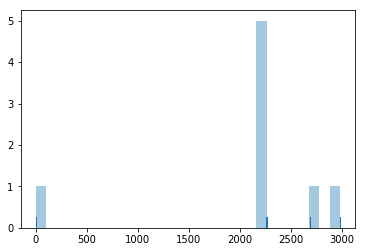

In [229]:
sns.distplot(a, kde=False, rug=True,label=df.isna().sum().index)

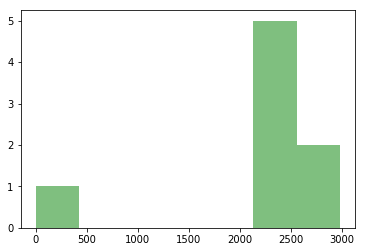

In [485]:
import matplotlib.mlab as mlab 
import matplotlib.pyplot as plt


num_bins = 7
n, bins, patches = plt.hist(a, num_bins, facecolor='green', alpha=0.5)
plt.show()

## QUESTION 4

In [443]:
df.groupby('job_title')['salary_curr'].mean().sort_values(ascending = False).head(1)

job_title
anesthesiologist    372500.0
Name: salary_curr, dtype: float64

In [444]:
df_ane = df[df.job_title == 'anesthesiologist']

In [445]:
df_ane

,Timestamp,age,industry,job_title,salary,currency,location,post_college experience,region_locations,salary_curr,Identifier
2839,4/24/2019 12:55:25,35-44,healthcare industry,anesthesiologist,300000.0,1.0,bostonmausa,8 - 10 years,northeast,300000.0,2572
14698,4/26/2019 14:43:05,35-44,healthcare industry,anesthesiologist,420000.0,1.0,san antonio tx,21 - 30 years,south,420000.0,13278
14776,4/26/2019 14:53:35,35-44,healthcare industry,anesthesiologist,420000.0,1.0,san antonio tx,21 - 30 years,south,420000.0,13351
15869,4/26/2019 17:33:27,35-44,healthcare industry,anesthesiologist,350000.0,1.0,tampafloridausa,5-7 years,northeast,350000.0,14312


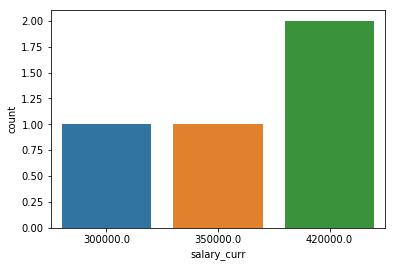

In [452]:
#highest average salary is for job anesthesiologist
#there are two records with salary as 420000 and one record each for salary as 300000 and 350000 respectively.
sns.countplot(df_ane.salary_curr)

In [453]:
df.groupby('job_title')['salary_curr'].mean().sort_values(ascending = True).head(10)

job_title
phd candidate             26075.000000
teller                    27932.000000
admissions counselor      35770.000000
customer service          36151.000000
phd student               36536.777778
receptionist              36706.865263
counselor                 36875.000000
admin                     37710.416667
administrative support    38433.600000
collector                 38750.000000
Name: salary_curr, dtype: float64

In [454]:
df_phd = df[df.job_title == 'phd candidate']

In [455]:
len(df_phd)

4

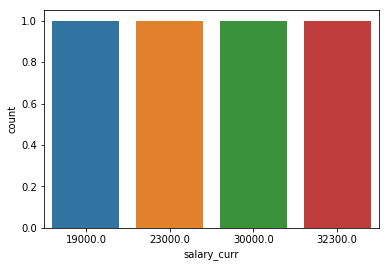

In [456]:
# lowest average salary is for phd candidate with salaries 19000, 23000, 30000 and 32300
sns.countplot(df_phd.salary_curr)

In [235]:
df['job_title'] = df['job_title'].str.strip()

tag= df.groupby('job_title').aggregate(np.count_nonzero)

tag1 = tag[tag['industry'] >= 4].index
df = df[df['job_title'].isin(tag1)]

## Question 5

In [231]:
df['unique id'] = range(1, len(df) + 1)

In [122]:
df.head()

,Timestamp,age,industry,job_title,salary,currency,location,post_college experience,region_locations,salary_curr,Identifier
0,4/24/2019 11:43:21,35-44,government,director,75000.0,1.00,nashville tn,11 - 20 years,midwest,75000.0,1
1,4/24/2019 11:43:26,25-34,Software industry,director,65000.0,1.00,madison wi,8 - 10 years,midwest,65000.0,2
2,4/24/2019 11:43:27,18-24,Marketing Industry,assistant,36330.0,1.00,las vegas nv,2 - 4 years,south,36330.0,3
3,4/24/2019 11:43:27,25-34,Software industry,senior scientist,34600.0,1.27,cardiff uk,5-7 years,south,43942.0,4
4,4/24/2019 11:43:29,25-34,Healthcare Industry,social worker,55000.0,1.00,southeast michigan usa,5-7 years,midwest,55000.0,5


In [233]:
df.columns=['Timestamp',
            'age',
            'industry',
            'job_title',
            'salary',
            'currency',
            'location',
            'post_college experience',
            'region_locations',
            'salary_curr',
            'Identifier'
            ]

## QUESTION 6

In [239]:
x = df[(df['salary_curr'] > 60000) & ((df['post_college experience'] == '1 year or less') |\
                               (df['post_college experience'] == '2 - 4 years') | (df['post_college experience'] == '5 - 7  years') )]
#x['post_college experience'].nunique()

In [240]:
x

,Timestamp,age,industry,job_title,salary,currency,location,post_college experience,region_locations,salary_curr,Identifier
35,4/24/2019 11:43:55,18-24,ecommerce industry,analyst,68000.0,1.00,boston ma united states of america,1 year or less,northeast,68000.0,33
47,4/24/2019 11:44:01,25-34,government,biologist,86179.0,1.00,alexandria va usa,2 - 4 years,midwest,86179.0,44
83,4/24/2019 11:44:38,25-34,accounting,senior accountant,75000.0,1.00,philadelphia pa suburbs,2 - 4 years,midwest,75000.0,80
104,4/24/2019 11:45:03,25-34,legal industry,associate,125000.0,1.00,philadelphia pa usa,2 - 4 years,midwest,125000.0,99
133,4/24/2019 11:45:32,25-34,tech,engineer,72000.0,1.00,st louis mo usa,2 - 4 years,st louis mo usa,72000.0,125
137,4/24/2019 11:45:33,18-24,marketing industry,engineer,70000.0,1.00,dallas texas us,2 - 4 years,south,70000.0,128
251,4/24/2019 11:47:51,25-34,construction,manager,73000.0,1.00,yuma arizona,2 - 4 years,northeast,73000.0,223
279,4/24/2019 11:48:27,25-34,government,analyst,82400.0,0.75,ottawa,2 - 4 years,west,61800.0,244
284,4/24/2019 11:48:30,25-34,marketing industry,manager,70000.0,1.00,chicago il usa,2 - 4 years,midwest,70000.0,249
320,4/24/2019 11:49:09,25-34,financial industry,manager,89000.0,1.00,boston ma usa,2 - 4 years,northeast,89000.0,281


## QUESTION 7

In [252]:
df33 = df.copy()

In [256]:
df33['Data Scientist'] = ((df['job_title'].str.contains('data scientist')) | (df['job_title'].str.contains('data dcien')))

In [260]:
df33[df33['Data Scientist']== True].groupby('region_locations')['Data Scientist'].count().sort_values(ascending = False)

region_locations
midwest      17
south        13
west          5
northeast     5
uk            1
boston        1
Name: Data Scientist, dtype: int64

In [245]:
len(df33)

12676

In [263]:
df33[(df33['region_locations'] == 'midwest') & (df33['Data Scientist'] == True)]

,Timestamp,age,industry,job_title,salary,currency,location,post_college experience,region_locations,salary_curr,Identifier,Data Scientist
277,4/24/2019 11:48:25,35-44,government,data scientist,138000.0,1.00,washington dc,11 - 20 years,midwest,138000.0,243,True
314,4/24/2019 11:49:02,25-34,software industry,senior data scientist,145000.0,1.00,washington dcusa,11 - 20 years,midwest,145000.0,275,True
482,4/24/2019 11:52:13,25-34,software industry,data scientist,102000.0,1.00,new york ny,8 - 10 years,midwest,102000.0,426,True
500,4/24/2019 11:52:35,25-34,software industry,data scientist,165000.0,1.00,new york ny usa,5-7 years,midwest,165000.0,442,True
2526,4/24/2019 12:44:51,25-34,financial industry,data scientist,52000.0,1.13,ireland,5-7 years,midwest,58760.0,2285,True
4474,4/25/2019 0:05:33,18-24,software industry,data scientist,80900.0,1.00,new york city,2 - 4 years,midwest,80900.0,4071,True
7197,4/24/2019 14:30:24,25-34,r&d industry,data scientist,75000.0,1.00,missouriunited states,5-7 years,midwest,75000.0,6553,True
7309,4/24/2019 14:38:36,25-34,software industry,data scientist,123000.0,1.00,washington dc,5-7 years,midwest,123000.0,6652,True
9849,4/24/2019 19:43:48,45-54,software industry,senior data scientist,93500.0,1.00,chicago il usa,11 - 20 years,midwest,93500.0,8961,True
10531,4/24/2019 22:25:29,35-44,geospatial,data scientist,82000.0,1.00,charlottesville va,5-7 years,midwest,82000.0,9582,True


## QUESTION 8

In [461]:
df_8 = df.copy()

In [465]:
df_8.age.unique()

array(['35-44', '25-34', '18-24', '45-54', '55-64', '65 or over',
       'under 18'], dtype=object)

In [462]:
df_8.head()

,Timestamp,age,industry,job_title,salary,currency,location,post_college experience,region_locations,salary_curr,Identifier
0,4/24/2019 11:43:21,35-44,government,director,75000.0,1.00,nashville tn,11 - 20 years,midwest,75000.0,1
1,4/24/2019 11:43:26,25-34,software industry,director,65000.0,1.00,madison wi,8 - 10 years,midwest,65000.0,2
2,4/24/2019 11:43:27,18-24,marketing industry,assistant,36330.0,1.00,las vegas nv,2 - 4 years,south,36330.0,3
3,4/24/2019 11:43:27,25-34,software industry,senior scientist,34600.0,1.27,cardiff uk,5-7 years,south,43942.0,4
4,4/24/2019 11:43:29,25-34,healthcare industry,social worker,55000.0,1.00,southeast michigan usa,5-7 years,midwest,55000.0,5


In [473]:
df_new8 = df_8[((df_8.age == '25-34') | (df_8.age == '35-44') | (df_8.age == '45-54')
              | (df_8.age == '55-64') | (df_8.age == '65 or over')) & (df_8.salary_curr == 100000)]

In [477]:
#probability is 1.46%
len(df_new8)/len(df_8) * 100

1.4673398548437993

## QUESTION 9

In [ ]:
## FIRST INSIGHT DISTRIBUTION OF INDUSTRIES IN DIFFERENT REGIONS

In [276]:
df.head()

,Timestamp,age,industry,job_title,salary,currency,location,post_college experience,region_locations,salary_curr,Identifier
0,4/24/2019 11:43:21,35-44,government,director,75000.0,1.00,nashville tn,11 - 20 years,midwest,75000.0,1
1,4/24/2019 11:43:26,25-34,software industry,director,65000.0,1.00,madison wi,8 - 10 years,midwest,65000.0,2
2,4/24/2019 11:43:27,18-24,marketing industry,assistant,36330.0,1.00,las vegas nv,2 - 4 years,south,36330.0,3
3,4/24/2019 11:43:27,25-34,software industry,senior scientist,34600.0,1.27,cardiff uk,5-7 years,south,43942.0,4
4,4/24/2019 11:43:29,25-34,healthcare industry,social worker,55000.0,1.00,southeast michigan usa,5-7 years,midwest,55000.0,5


Insight 1: industries most prevelant in the midwest region are software, education and healthcare. In south, northeast and west most recruits are from the software industry. Hence, HR data science team should hire these industries for their from those locations.

In [275]:
df.groupby(['region_locations', 'industry'])['industry'].count().sort_values(ascending = False).head(6)

region_locations  industry           
midwest           software industry      1555
                  education industry      878
                  healthcare industry     526
south             software industry       502
northeast         software industry       437
west              software industry       320
Name: industry, dtype: int64

In [284]:
## Insight 2 REGIONWISE JOBS WITH MAXIMUM SALARIES

insight 2: these are the max salaries for job titles in different regions. This will be helpful for the HR data science team while recruiting and for salary negotiations

In [458]:
df.groupby(['region_locations', 'job_title'])['salary_curr'].max().sort_values(ascending = False).head(6)

region_locations  job_title 
west              executives    1778400.0
northeast         engineer      1580000.0
west              assistant     1485000.0
northeast         director      1470000.0
midwest           senior        1250008.0
south             attorney      1115000.0
Name: salary_curr, dtype: float64

In [285]:
## INSIGHT 3 10 hottest jobs in the west coast

Insight 3: for the west coast, these are the average salaries for different job titles and this can be used in hiring and appraisals.

In [286]:
df_west = df[df.region_locations == 'west']

In [459]:
df.groupby(['job_title'])['salary_curr'].mean().sort_values(ascending = False).head(10)

job_title
anesthesiologist        372500.000000
physician               310603.571429
partner                 281825.000000
business development    281250.000000
ceo                     230266.666667
coo                     217613.636364
financial advisor       208769.230769
principal               202091.304348
vice president          200709.122137
senior counsel          191750.000000
Name: salary_curr, dtype: float64

## QUESTION 10

In [304]:
y=df['salary_curr']

In [313]:
X = df[['job_title', 'region_locations', 'industry']]

In [314]:
X

,job_title,region_locations,industry
0,director,midwest,government
1,director,midwest,software industry
2,assistant,south,marketing industry
3,senior scientist,south,software industry
4,social worker,midwest,healthcare industry
5,associate,west,software industry
6,manager,south,software industry
7,executives,midwest,education industry
8,director,midwest,libraries
9,copywriter,dc,services industry


In [315]:
X = pd.get_dummies(data = X, columns = ['job_title', 'region_locations', 'industry'])

In [316]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [317]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [318]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [319]:
predictions = lm.predict(X_test)

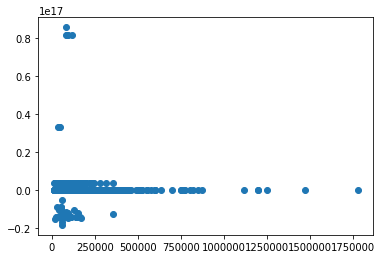

In [320]:
plt.scatter(y_test,predictions)

In [297]:
from sklearn.linear_model import LinearRegression

In [321]:
from sklearn import linear_model
regLasso = linear_model.Lasso()

In [322]:
regLasso.fit(X,y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [323]:
regLasso.coef_

array([ -8648.43023656,   -307.42949637,   9900.35636995, ...,
       -52262.7848698 ,      0.        ,      0.        ])

In [324]:
{X.columns[i] : regLasso.coef_[i] for i in range(0,len(X.columns))}

{'job_title_academic advisor': -8648.430236559238,
 'job_title_academic librarian': -307.42949637295146,
 'job_title_account supervisor': 9900.356369951556,
 'job_title_accountant': -18909.834725253644,
 'job_title_accountant ii': -8261.760340123501,
 'job_title_accounting specialist': -26525.397642026936,
 'job_title_accounting supervisor': 2841.8420155070944,
 'job_title_acquisitions editor': 1542.4732525762054,
 'job_title_actuary': 56616.96254911998,
 'job_title_admin': -31490.09162714061,
 'job_title_administrative officer': -11968.151552302157,
 'job_title_administrative specialist': -18648.703348480198,
 'job_title_administrative support': -24921.95400211698,
 'job_title_administrator': -15674.461825275745,
 'job_title_admissions counselor': -19163.623260783883,
 'job_title_adult services librarian': -0.0,
 'job_title_advisor': -0.0,
 'job_title_agent': -15432.485945738188,
 'job_title_analyst': 1264.6522208118097,
 'job_title_anesthesiologist': 290759.4291056016,
 'job_title_ar

In [325]:
pd.Series({X.columns[i] : regLasso.coef_[i] \
               for i in range(0,len(X.columns))} )

industry_                                       4463.175880
industry_accounting                             9630.503866
industry_accounting  tax                          -0.000000
industry_accounting big                        14556.578082
industry_acedemia                             -20131.196841
industry_ad agency                             75872.328732
industry_ad tech                               -3163.496169
industry_admin                                  -386.612536
industry_admin ar billing                     -53775.671269
industry_administration                       -24835.807306
industry_adtech                                 3131.752218
industry_advertisind                           35723.215376
industry_advertizing                          -14839.087147
industry_aec                                   -6447.955620
industry_aeco                                     -0.000000
industry_aero                                  36234.167594
industry_aerospace                      

In [326]:
s = pd.Series({X.columns[i] : regLasso.coef_[i]
               for i in range(0,len(X.columns))} )

In [327]:
s[s != 0]

industry_                                       4463.175880
industry_accounting                             9630.503866
industry_accounting big                        14556.578082
industry_acedemia                             -20131.196841
industry_ad agency                             75872.328732
industry_ad tech                               -3163.496169
industry_admin                                  -386.612536
industry_admin ar billing                     -53775.671269
industry_administration                       -24835.807306
industry_adtech                                 3131.752218
industry_advertisind                           35723.215376
industry_advertizing                          -14839.087147
industry_aec                                   -6447.955620
industry_aero                                  36234.167594
industry_aerospace                             30446.394316
industry_aerospace  defense                    32761.305924
industry_aerospace  defense manufacturin

In [328]:
y_pred = regLasso.predict(X_test)

In [ ]:
##

In [330]:
(y_pred - y_test).abs().mean()

34132.97238013358

In [332]:
((y_pred - y_test)**2).mean()

5086397474.622538

## QUESTION 11

## PREDICTING IF THE JOB TITLE IS DATA SCIENTIST

In [333]:
df.head()

,Timestamp,age,industry,job_title,salary,currency,location,post_college experience,region_locations,salary_curr,Identifier
0,4/24/2019 11:43:21,35-44,government,director,75000.0,1.00,nashville tn,11 - 20 years,midwest,75000.0,1
1,4/24/2019 11:43:26,25-34,software industry,director,65000.0,1.00,madison wi,8 - 10 years,midwest,65000.0,2
2,4/24/2019 11:43:27,18-24,marketing industry,assistant,36330.0,1.00,las vegas nv,2 - 4 years,south,36330.0,3
3,4/24/2019 11:43:27,25-34,software industry,senior scientist,34600.0,1.27,cardiff uk,5-7 years,south,43942.0,4
4,4/24/2019 11:43:29,25-34,healthcare industry,social worker,55000.0,1.00,southeast michigan usa,5-7 years,midwest,55000.0,5


In [337]:
df_11 = df[df.job_title == 'data scientist']

In [338]:
df_new = df.copy()


In [340]:
df_new['DS'] = (df_new.job_title == 'data scientist')

In [342]:
Y = (df_new.DS * 1)

In [346]:
X = df_new[['job_title', 'region_locations', 'industry']]

In [347]:
X = pd.get_dummies(data = X, columns = ['job_title', 'region_locations', 'industry'])

In [350]:
X_train, X_test, Y_train, Y_test = \
train_test_split(X,Y,test_size=0.4,random_state = 0)

In [351]:
from sklearn.ensemble import RandomForestClassifier

In [352]:
cl = RandomForestClassifier(random_state = 0)
cl.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [353]:
cl.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

accuracy

In [354]:
(cl.predict(X_test) == Y_test).mean()

0.9994084007099191

In [355]:
y_pred = cl.predict(X_test)

In [356]:
y_pred[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

predicted probabilities

In [358]:
cl.predict_proba(X_test)
cl.predict_proba(X_test)[:,1]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

array([0., 0., 0., ..., 0., 0., 0.])

In [359]:
y_pred_proba = cl.predict_proba(X_test)[:,1]

In [360]:
y_pred_proba[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

## QUESTION 12

In [361]:
from sklearn.cluster import KMeans

In [411]:
df_clu = df.copy()

In [412]:
df_clu = df_clu[['salary_curr','region_locations']]

In [413]:
df_new2 = pd.get_dummies(columns = ['region_locations'], data = df_clu)

In [414]:
df_new2.head()

,salary_curr,region_locations_,region_locations_apoaeunited states,region_locations_apoaeusa,region_locations_ashburn va usa,region_locations_athens ga,region_locations_athens ga united states,region_locations_athens greece,region_locations_athensgausa,region_locations_au,...,region_locations_ut,region_locations_utaj,region_locations_va,region_locations_va usa,region_locations_west,region_locations_west sussex uk,region_locations_wfh,region_locations_woodstockgausa,region_locations_wv,region_locations_yow
0,75000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,65000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,36330.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,43942.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,55000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [383]:
from sklearn.cluster import KMeans

In [415]:
clu = KMeans(n_clusters=3, random_state=0)
clu.fit(df_new2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [416]:
clu.labels_

array([2, 2, 2, ..., 0, 2, 2], dtype=int32)

In [418]:
df_new3 = df_new2.copy()
df_new3['cluster'] = clu.labels_
df_new3.groupby('cluster').mean().T

cluster,0,1,2
salary_curr,163732.200432,598354.614286,66139.695203
region_locations_,0.000000,0.000000,0.000307
region_locations_apoaeunited states,0.000000,0.000000,0.000102
region_locations_apoaeusa,0.000000,0.000000,0.000102
region_locations_ashburn va usa,0.000363,0.000000,0.000102
region_locations_athens ga,0.000000,0.000000,0.000102
region_locations_athens ga united states,0.000000,0.000000,0.000102
region_locations_athens greece,0.000000,0.000000,0.000102
region_locations_athensgausa,0.000000,0.000000,0.000102
region_locations_au,0.000000,0.000000,0.000102
